In [2]:
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import numpy as np
import corner.corner as corner
from copy import deepcopy

from plot import msplot

ModuleNotFoundError: No module named 'plot'

In [1]:
filename='/Users/stormcolloms/Documents/PhD/Project_work/AMAZE_model_selection/rns/KDE_nflows_140923_posteriorsunc/output.hdf5'
f = h5py.File(filename, 'r')
samples = f['model_selection']['samples']

samples.shape[0]/16

"""msplot.plot_samples(samples.reshape(samples.shape[0]/16), submodels_dict, model_names, channels, model0, name=args.name, hyper_idx=hyper_idx, detectable_beta=False)
        
f = h5py.File(filename, 'r')
f.keys()"""

NameError: name 'h5py' is not defined

Rel samples in chi_b=0. = 0.3982421875
Rel samples in chi_b=0.1 = 0.337125
Rel samples in chi_b=0.2 = 0.176421875
Rel samples in chi_b=0.3 = 0.0882109375


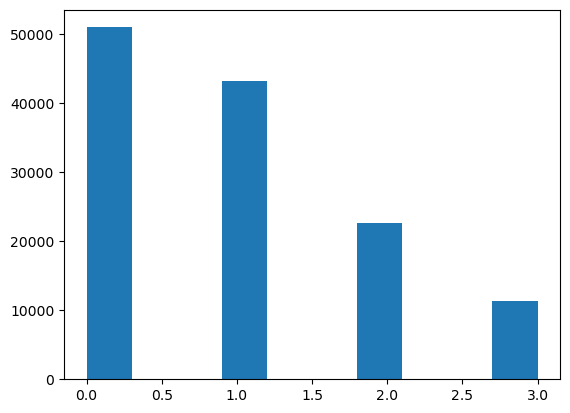

In [3]:
#relative samples in each chi_b
chi_b_samps = list(f['model_selection']['samples']['block1_values'][:,0])
plt.hist(chi_b_samps)
no_chib_samps = np.unique(chi_b_samps, return_counts=True)[1]
print(f'Rel samples in chi_b=0. = {no_chib_samps[0]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.1 = {no_chib_samps[1]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.2 = {no_chib_samps[2]/len(chi_b_samps)}')
print(f'Rel samples in chi_b=0.3 = {no_chib_samps[3]/len(chi_b_samps)}')

In [4]:
np.mean(chi_b_samps)

0.9546015625

Rel samples in alpha=0.2 = 0.200453125
Rel samples in alpha=0.5 = 0.2049140625
Rel samples in alpha=1. = 0.1996484375
Rel samples in alpha=2. = 0.1970546875
Rel samples in alpha=5. = 0.1979296875


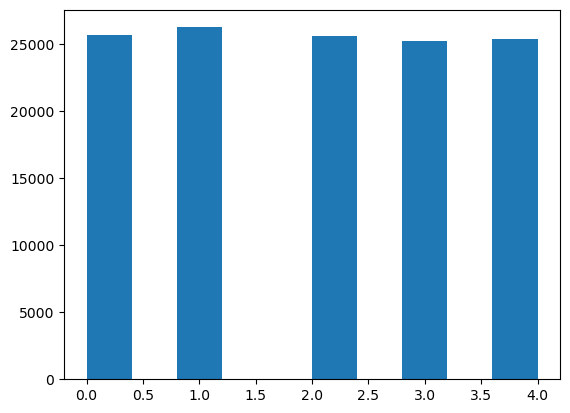

In [5]:
#relative samples in each alpha
alpha_samps = list(f['model_selection']['samples']['block1_values'][:,1])
plt.hist(alpha_samps)
no_alpha_samps = np.unique(alpha_samps, return_counts=True)[1]
print(f'Rel samples in alpha=0.2 = {no_alpha_samps[0]/len(alpha_samps)}')
print(f'Rel samples in alpha=0.5 = {no_alpha_samps[1]/len(alpha_samps)}')
print(f'Rel samples in alpha=1. = {no_alpha_samps[2]/len(alpha_samps)}')
print(f'Rel samples in alpha=2. = {no_alpha_samps[3]/len(alpha_samps)}')
print(f'Rel samples in alpha=5. = {no_alpha_samps[4]/len(alpha_samps)}')

In [6]:
np.mean(alpha_samps)

1.98709375

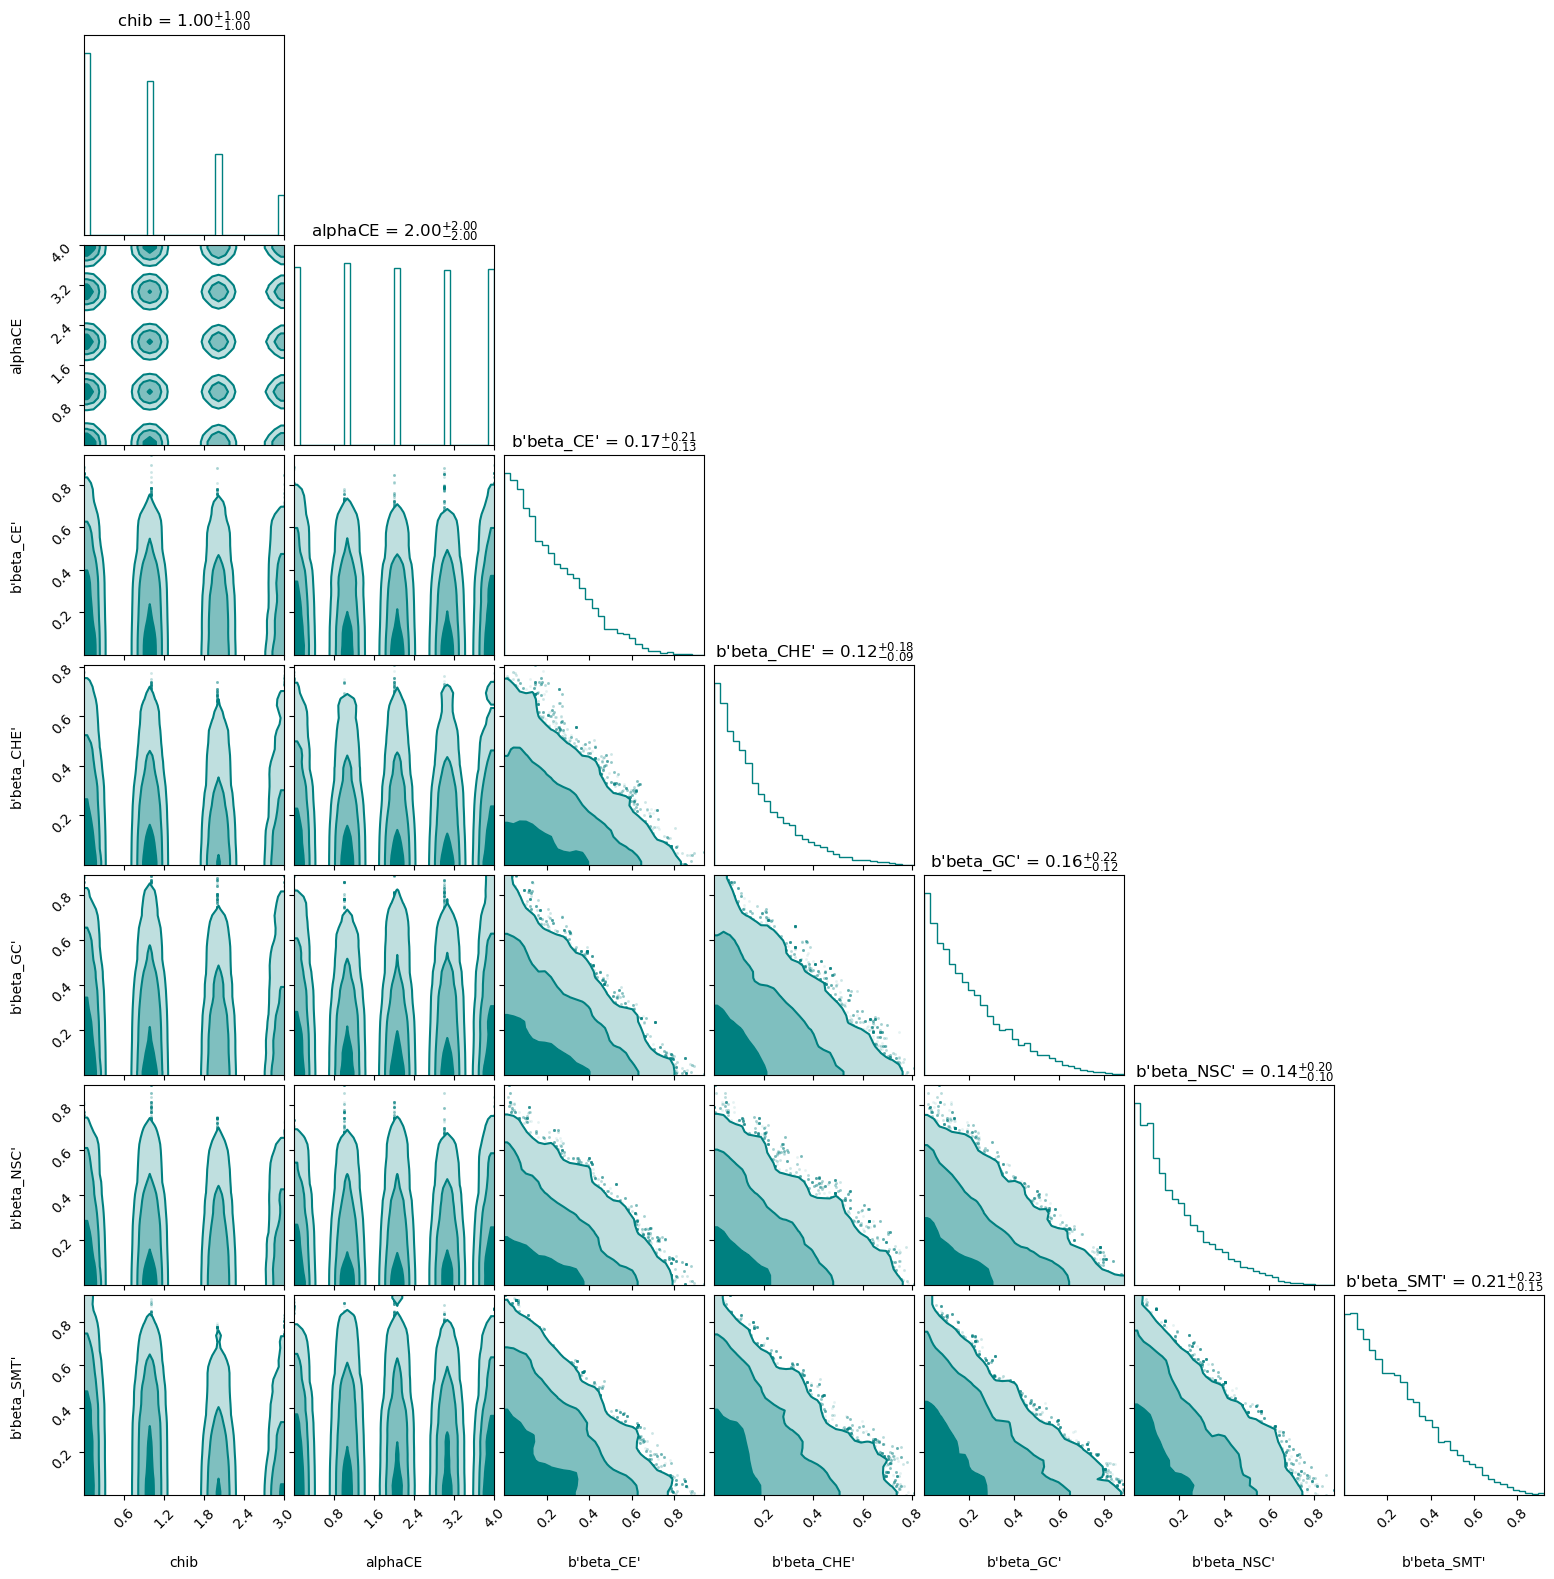

In [8]:
#corner plots of betas
branching_fracs = np.array(f['model_selection']['samples']['block0_values'])
chib_alpha = np.array(f['model_selection']['samples']['block1_values'])
hyperparams = np.hstack((chib_alpha, branching_fracs))

corner_kwargs = dict(
    bins=32,
    smooth=0.9,
    color="teal",
    #quantiles=[0.16, 0.84],
    levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.0)),
    plot_density=True,
    plot_datapoints=True,
    fill_contours=True,
    show_titles=True,
    hist_kwargs=dict(density=True),
    labels=['chib','alphaCE']+list(f['model_selection']['samples']['block0_items'])
)
#kwargs = deepcopy(corner_kwargs)
fig_data = corner(hyperparams, **corner_kwargs)

In [19]:
list(f['model_selection']['samples'])

['axis0',
 'axis1',
 'block0_items',
 'block0_values',
 'block1_items',
 'block1_values']

In [9]:
np.mean(branching_fracs, axis=0)

array([0.20938181, 0.16169838, 0.20340396, 0.18203793, 0.24347792])